In [1]:
import numpy as np

In [3]:
def trimf(x, abc):
    """
    Triangular membership function generator.

    Parameters
    ----------
    x : 1d array
        Independent variable.
    abc : 1d array, length 3
        Three-element vector controlling shape of triangular function.
        Requires a <= b <= c.

    Returns
    -------
    y : 1d array
        Triangular membership function.

    """
    assert len(abc) == 3, 'abc parameter must have exactly three elements.'
    a, b, c = np.r_[abc]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = (x[idx] - a) / float(b - a)

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = (c - x[idx]) / float(c - b)

    idx = np.nonzero(x == b)
    y[idx] = 1
    return y

x = [0,5,10]
test = trimf(x, [0,0,2])
print(test)

TypeError: only integer scalar arrays can be converted to a scalar index

In [7]:
from antecedent import Antecedent

values = np.arange(0, 10, 1)
test = Antecedent(values, 'test')
test.set_mf('poor', 'trimf', [0, 0, 5])
# test.view()

AxisError: axis 1 is out of bounds for array of dimension 0

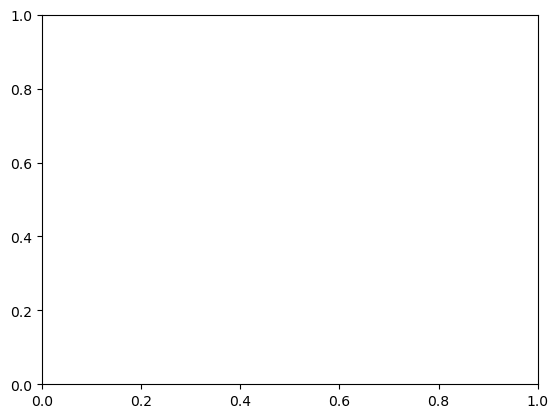

In [8]:
test.view()